### DEMMATH02 

# Computing Function Inner Products, Norms & Metrics

In [1]:
from compecon import demo
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy as sp

%matplotlib inline

##  Class function

We now define the class **function**. An object of class **function** operates just as a lambda function, but it supports several function operations: sum, substraction, multiplication, division, power, absolute value, integral,  norm, and angle.

This example illustrates how it is possible to overwrite the methods of the function class.

In [2]:
class function:
    def __init__(self, func):
        self.f = func     
    
    def __call__(self, *args):
        return self.f(*args)
    
    def __add__(self, other):
        return function(lambda *args: self.f(*args) + other.f(*args))
    
    def __sub__(self, other):
        return function(lambda *args: self.f(*args) - other.f(*args))
    
    def __mul__(self, other):
        return function(lambda *args: self.f(*args) * other.f(*args))
   
    def __pow__(self, n):
        return function(lambda *args: self.f(*args) ** n)
   
    def __truediv__(self, other):
        return function(lambda *args: self.f(*args) / other.f(*args))
   
    def integral(self, l, h):
        return integrate.quad(self.f, l, h)[0]
    
    def abs(self):
        return function(lambda *args: np.abs(self.f(*args)))
    
    def norm(self, l, h, p=2):
        return  ((self.abs()) ** p).integral(l, h) ** (1/p)
    
    def angle(self, other, l, h):
        fg = (self * other).integral(l, u)
        ff = (self**2).integral(l, u)
        gg = (other**2).integral(l, u)
        return np.arccos(fg*np.sqrt(ff*gg))*180/np.pi

## Compute inner product and angle

Define the functions $f(x) = 2x^2-1$ and $g(x)= 4x^3-3x$, both over the domain $[-1,1]$. Compute their inner product and angle.

In [3]:
l, u = -1, 1
f = function(lambda x: 2 * x**2 - 1)
g = function(lambda x: 4 * x**3 - 3*x)

fg = (f*g).integral(l, u)
ff = (f**2).integral(l, u)
gg = (g**2).integral(l, u)
angle = f.angle(g, l, u)

print(f'\u222b (f*g)(x)dx = {fg:.2f}')
print(f'\u222b (f^2)(x)dx = {ff:.2f}')
print(f'\u222b (g^2)(x)dx = {gg:.2f}')
print(f'Angle in degrees = {angle:.0f}°')

∫ (f*g)(x)dx = 0.00
∫ (f^2)(x)dx = 0.93
∫ (g^2)(x)dx = 0.97
Angle in degrees = 90°


## Compute Function Norm

Now compute the norm of function $f(x) = x^2 - 1$ over the domain $[0, 2]$.

In [4]:
l, u = 0, 2
f = function(lambda x: x ** 2 - 1)

print(f'\u2225 f \u2225\u2081 = {f.norm(l, u, 1):.3f}')
print(f'\u2225 f \u2225\u2082 = {f.norm(l, u, 2):.3f}')

∥ f ∥₁ = 2.000
∥ f ∥₂ = 1.751


## Compute function metrics

In [5]:
l, u = 0, 1

f = function(lambda x: 5 + 5*x**2)
g = function(lambda x: 4 + 10*x - 5*x**2)

print((f-g).norm(l, u, 1))
print((f-g).norm(l, u, 2))


print(f'\u2225 f-g \u2225\u2081 = {(f-g).norm(l, u, 1):.3f}')
print(f'\u2225 f-g \u2225\u2082 = {(f-g).norm(l, u, 2):.3f}')

0.8825266728608311
1.0
∥ f-g ∥₁ = 0.883
∥ f-g ∥₂ = 1.000


### Illustrate Function metrics

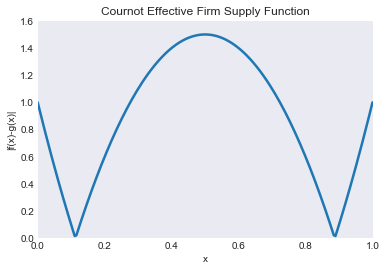

In [6]:
x = np.linspace(l,u,200)

demo.figure('Cournot Effective Firm Supply Function', 
            'x', '|f(x)-g(x)|', [0, 1], [0, 1.6])
plt.plot(x, (f-g).abs()(x))


### Demonstrate Pythagorean Theorem

Again, define the functions $f(x) = 2x^2-1$ and $g(x)= 4x^3-3x$, both over the domain $[-1,1]$. 

In [7]:
l,u = -1, 1
f = function(lambda x: 2 * x**2 - 1)
g = function(lambda x: 4 * x**3 - 3*x)

ifsq = (f**2).integral(l,u)
igsq = (g**2).integral(l,u)
ifplusgsq = ((f+g)**2).integral(l,u)

In [8]:
print(f'\u222b f\u00b2(x)dx = {ifsq:.4f}')
print(f'\u222b g\u00b2(x)dx = {igsq:.4f}')
print(f'\u222b (f+g)\u00b2(x)dx = {ifplusgsq:.4f}')

∫ f²(x)dx = 0.9333
∫ g²(x)dx = 0.9714
∫ (f+g)²(x)dx = 1.9048
